# Analyzing the auto.csv dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols  # ordinary least squares
from scipy.stats import t
import seaborn as sns
%matplotlib inline

Access the dataset:

In [2]:
auto=pd.read_csv('https://raw.githubusercontent.com/AtanasiuDemian/Introduction-to-Statistical-Learning---Python/master/Data/Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Start with some EDA:

In [3]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Note that the data is incomplete and entries of $\textbf{horsepower}$ are strings. This can cause issues.

In [4]:
auto[auto.horsepower=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


Hence clean up the data:

In [5]:
auto=auto[auto.horsepower!='?']
auto['horsepower']=auto.horsepower.astype(float)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


As noted in the book, the "cylinders" column can be treated as a qualitative variable, since it can take only a handful of values. Create different boxplots of "mpg" for each value of "cylinders". 

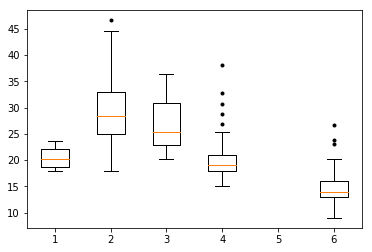

In [6]:
plt.boxplot([auto[auto.cylinders==c].mpg.values for c in range(3,9)], sym='k.')
plt.show()

From the collection of boxplots above, it seems like the distribution of "mpg" is affected by the numbers of cylinders.

Now remove the 10th through the 85th obervations and compare the new summary with the original one.

In [7]:
new_auto=pd.concat([auto[:10],auto[86:]])
new_auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,316.000000,316.000000,316.000000,316.000000,316.00000,316.000000,316.000000,316.000000
mean,24.407595,5.373418,187.512658,100.848101,2936.53481,15.717405,77.136076,1.601266
std,7.863285,1.654179,100.114616,35.954147,811.87445,2.713876,3.123464,0.819910
min,11.000000,3.000000,68.000000,46.000000,1649.00000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,100.250000,75.000000,2213.75000,14.000000,75.000000,1.000000
50%,23.950000,4.000000,145.500000,90.000000,2792.50000,15.500000,77.000000,1.000000
75%,30.550000,6.000000,250.000000,115.000000,3508.00000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.00000,24.800000,82.000000,3.000000


Suppose we want to predict "mpg". Intuitively the gas mileage should be related to weight (e.g. a heavy car will use more fuel):

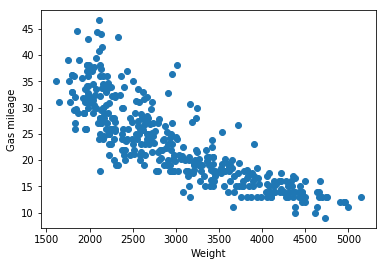

In [8]:
plt.scatter(auto.weight.values,auto.mpg.values)
plt.xlabel('Weight')
plt.ylabel('Gas mileage')
plt.show()

This shows quite a high correlation between the 2 variables and at first sight it looks like a linear relationship. There also seems to be a correlation between gas mileage and horsepower:

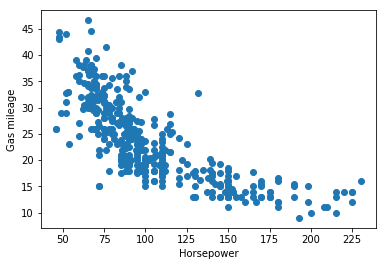

In [9]:
plt.scatter(auto.horsepower.values,auto.mpg.values)
plt.xlabel('Horsepower')
plt.ylabel('Gas mileage')
plt.show()

Fit a simple linear regression model with $\textbf{horsepower}$ as predictor variable and $\textbf{mpg}$ as response variable.

In [10]:
X=auto['horsepower'].values.reshape(-1,1)
y=auto['mpg'].values.reshape(-1,1)
lm=LinearRegression()
lm.fit(X,y)
print('Coefficient: ', lm.coef_[0],'\n Intercept: ', lm.intercept_[0])

Coefficient:  [-0.15784473] 
 Intercept:  39.9358610212


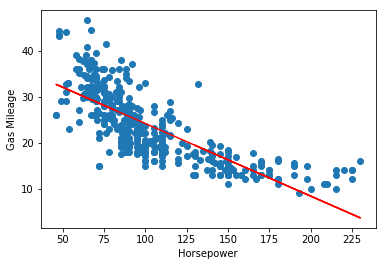

In [11]:
plt.scatter(auto.horsepower.values,auto.mpg.values)
plt.xlabel('Horsepower')
plt.ylabel('Gas Mileage')
plt.plot(auto.horsepower.values, lm.predict(X), '-', color='red')
plt.show()

There's a negative relationship between the predictor and response. The command below returns the $R^{2}$ statistic:

In [12]:
lm.score(X,y)

0.60594825788943485

This means that approximately $61\%$ of the variability in $mpg$ can be explained using $horsepower$. Compute the residual plot:

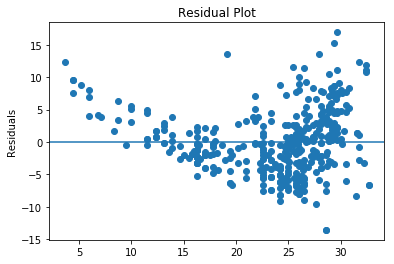

In [13]:
resid=auto.mpg.values.reshape(-1,1)-lm.predict(X)
plt.scatter(lm.predict(X), resid)
plt.axhline(y=0)
plt.title('Residual Plot')
plt.ylabel('Residuals')
plt.show()

Alternatively can perform the linear regression using $\texttt{statsmodels}$, which provides more information about the fit.

In [14]:
ols_model=ols('mpg ~ horsepower', auto).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 04 Feb 2018   Prob (F-statistic):           7.03e-81
Time:                        14:50:50   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let $\hat{y}$ be the predicted response variable for a given input $x_{0}$. Generate a confidence interval using the following identity:

$$ \hat{y} \pm t_{n-2} \ s_{y}\ \sqrt{\frac{1}{n}+ \frac{(x_{0}-\bar{x})^2}{(n-1)s_{x}^2}} $$

where $s_{y}$ is the residual standard error.

In [15]:
def conf_int(x):
    x_mean=auto.horsepower.values.mean()
    x_var=auto.horsepower.values.var()
    res=auto.mpg-ols_model.fittedvalues
    size=len(auto.mpg.values)
    RSE=np.sqrt(np.sum(res**2)/(size-2))
    unc=t.ppf(0.975,df=size-2)*RSE*np.sqrt(1.0/size+ (x-x_mean)**2/((size-1)*x_var))
    y_pred=ols_model.predict(exog=np.array([1,x]), transform=False)[0]
    return (y_pred-unc,y_pred+unc)

Suppose $\textbf{horsepower}=98$. Then the corresponding confidence interval for the predicted $\textbf{mpg}$ is given by:

In [16]:
conf_int(98)

(23.973061562845611, 24.961092742179236)

The same approach is used for generating the prediction interval, by the following expression:

$$ \hat{y} \pm t_{n-2} \ s_{y}\ \sqrt{1+ \frac{1}{n}+ \frac{(x_{0}-\bar{x})^2}{(n-1)s_{x}^2}} $$

In [17]:
def pred_int(x):
    x_mean=auto.horsepower.values.mean()
    x_var=auto.horsepower.values.var()
    res=auto.mpg-ols_model.fittedvalues
    size=len(auto.mpg.values)
    RSE=np.sqrt(np.sum(res**2)/(size-2))
    unc=t.ppf(0.975,df=size-2)*RSE*np.sqrt(1.0 + 1.0/size + (x-x_mean)**2/((size-1)*x_var))
    y_pred=ols_model.predict(exog=np.array([1,x]), transform=False)[0]
    return (y_pred-unc,y_pred+unc)

In [18]:
pred_int(98)

(14.809395181036972, 34.124759123987872)

Plot the data points and fitted regression line together with the confidence and prediction intervals:

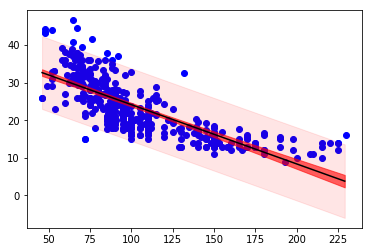

In [19]:
x_input=np.arange(auto.horsepower.min(),auto.horsepower.max(),1)
ci=np.array([conf_int(x) for x in x_input])
lower_conf, upper_conf=ci[:,0], ci[:,1]
pi=np.array([pred_int(x) for x in x_input])
lower_pred, upper_pred=pi[:,0], pi[:,1]
plt.scatter(auto.horsepower,auto.mpg, color='blue')
plt.plot(x_input, lm.predict(x_input.reshape(-1,1)), color='black') # easier to use sklearn for predicting
plt.fill_between(x_input, lower_conf, upper_conf, color='red', alpha=0.6)
plt.fill_between(x_input, lower_pred, upper_pred, color='red', alpha=0.1)
plt.show()

I will now move on to multiple linear regression. Begin by generating a scatterplot matrix comprising all variables in $\texttt{auto}$:

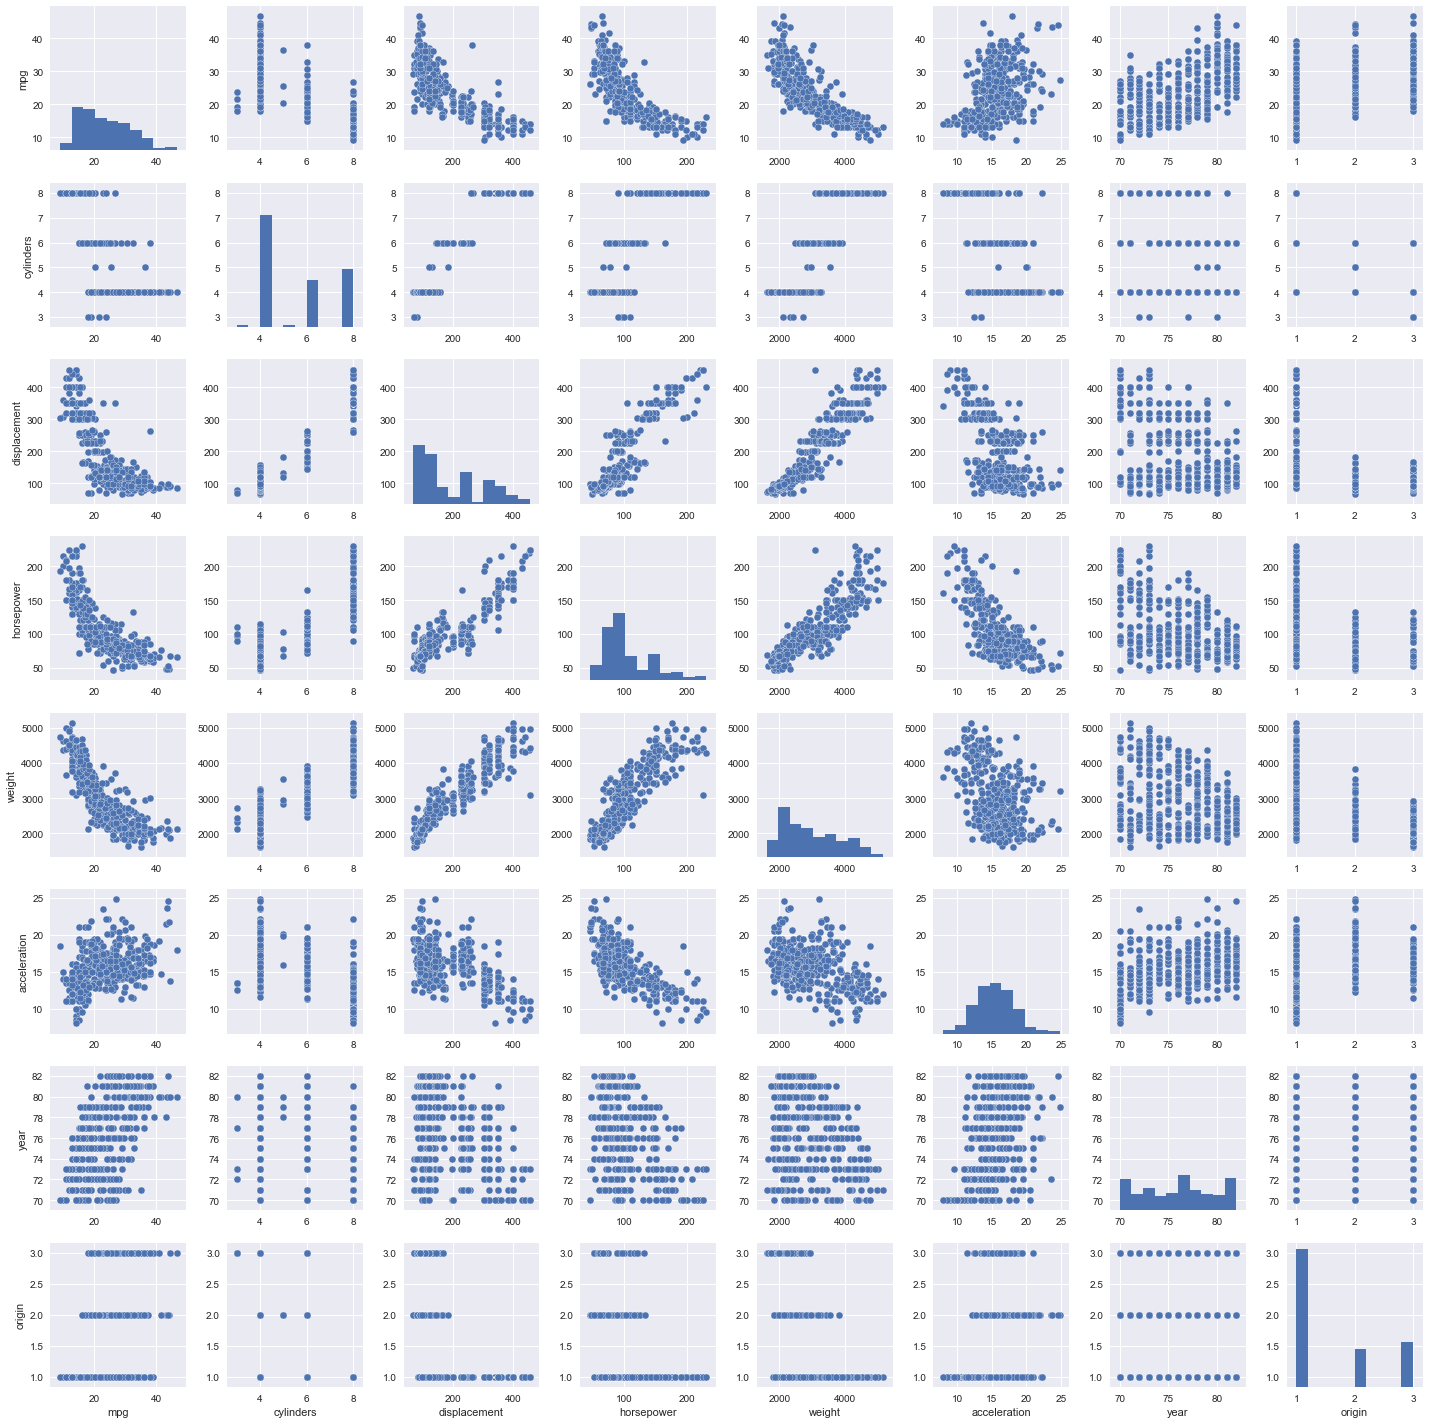

In [20]:
sns.set()
sns.pairplot(auto)

Now compute the correlation matrix:

In [21]:
corr=auto.corr()
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


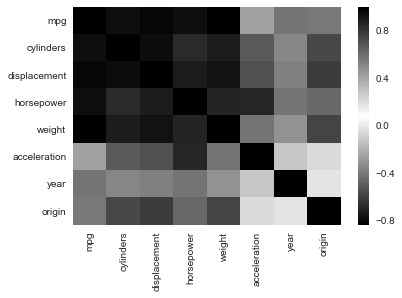

In [22]:
from matplotlib.colors import LinearSegmentedColormap
custom_map=LinearSegmentedColormap.from_list('custom_map', [(0, 'black'), (0.5, 'white'), (1.0, 'black')])
sns.heatmap(corr, cmap=custom_map)

Suppose, again, we want to predict $\textbf{mpg}$. Carry out a multiple linear regression with all quantitative variables as predictors:

In [23]:
mlr=ols('mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin', auto).fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        14:51:19   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The $R^2$ statistic is 0.821, thus better than the linear regression model. The statistically significant variables are $\textbf{displacement}, \ \textbf{weight}, \ \textbf{year}$ and $\textbf{origin}$. Remove the other ones and see how this affects the model:

In [24]:
mlr1=ols('mpg ~ displacement + weight + year + origin', auto).fit()
mlr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     435.1
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          9.57e-142
Time:                        14:51:19   Log-Likelihood:                -1027.2
No. Observations:                 392   AIC:                             2064.
Df Residuals:                     387   BIC:                             2084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -18.6065      4.028     -4.620      0.000     -26.526     -10.687
displacement     0.0056      0.005      1.172      0.242      -0.004       0.015
weight          -0.0066      0.001    -11.802      0.000      -0.008      -0.005
year             0.7714      0.050     15.486      0.000       0.673       0.869
origin           1.2262      0.267      4.593      0.000       0.701       1.751
==============================================================================
Omnibus:                       37.960   Durbin-Watson:                   1.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.311
Skew:                           0.562   Prob(JB):                     1.20e-16
Kurtosis:                       4.796   Cond. No.                     7.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The $R^2$ statistic has not changed much, confirming that $\textbf{cylinders},\ \textbf{horsepower}$ and $\textbf{acceleration}$ did not contribute much to the fit. 

I will now plot the histogram of residuals, in the simple linear regression model with $\textbf{mpg}$ as response and $\textbf{horsepower}$ as predictor.

(array([  2.,   0.,   2.,  16.,  44.,  45.,  67.,  74.,  50.,  34.,  15.,
         25.,   7.,   7.]),
 array([-15, -13, -11,  -9,  -7,  -5,  -3,  -1,   1,   3,   5,   7,   9,
         11,  13]),
 <a list of 14 Patch objects>)

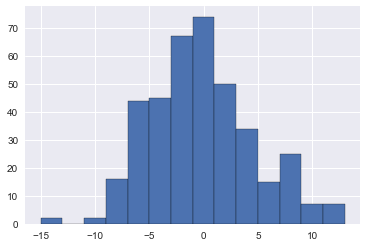

In [33]:
linreg=LinearRegression()
linreg.fit(auto.horsepower.values.reshape(-1,1), auto.mpg.values.reshape(-1,1))
plt.hist(auto.mpg.values.reshape(-1,1) - linreg.predict(auto.horsepower.values.reshape(-1,1)), ec='black', 
        bins = np.arange(-15,15,2))

We have reasons to believe the relationship between $\textbf{mpg}$ and $\textbf{horsepower}$ is nonlinear. I will now fit different polynomial models, to see which ones fits the data better, using the 3 resampling methods mentioned in the book : validation set, LOOCV and k-fold cross-validation.

In [53]:
# Validation set approach
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

X=auto.horsepower.values.reshape(-1,1)
y=auto.mpg.values.reshape(-1,1)
scaler=MinMaxScaler(copy=False)
scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
X_train.shape, X_test.shape

((196, 1), (196, 1))

Text(0,0.5,'Mean Squared Error')

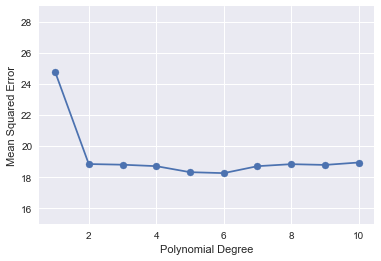

In [48]:
# Fit different polynomial models on the training set, and compute the MSE on the validation set.
degs, MSE = list(range(1,11)), []
for d in degs:
    model=make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(X_train, y_train)
    MSE.append(np.mean((y_test - model.predict(X_test))**2))
plt.scatter(degs, MSE)
plt.plot(degs, MSE)
plt.ylim(15,29)
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')

In [50]:
# LOOCV approach (will use polynomials of degree only up to 5)
from sklearn.model_selection import KFold

MSE={}
for d in range(1,6):
    MSE_d=[]
    kf=KFold(n_splits=len(X))
    for train,test in kf.split(X, y):
        X_train,X_test = X[train],X[test]
        model=make_pipeline(PolynomialFeatures(d), LinearRegression())
        model.fit(X_train, y[train])
        MSE_d.append(np.mean((y[test]-model.predict(X_test))**2))
    MSE[d]=np.mean(MSE_d)
MSE

{1: 24.231513517929226,
 2: 19.24821312448967,
 3: 19.33498406402904,
 4: 19.424430310430239,
 5: 19.033213854704051}

In [62]:
# k-fold CV with k=10.
# For some reason this gives me a higher MSE than the previous models and results in the book.
MSE={}
for d in range(1,11):
    MSE_d=[]
    kf=KFold(n_splits=10)
    for train,test in kf.split(X, y):
        X_train,X_test = X[train],X[test]
        model=make_pipeline(PolynomialFeatures(d), LinearRegression())
        model.fit(X_train, y[train])
        MSE_d.append(np.mean((y[test]-model.predict(X_test))**2))
    MSE[d]=np.mean(MSE_d)
MSE

{1: 27.439933652339864,
 2: 21.235840055802221,
 3: 21.336606183228408,
 4: 21.353886981861667,
 5: 20.905640931556032,
 6: 20.780516349344982,
 7: 20.641386385157283,
 8: 20.937798688759109,
 9: 20.815059979904213,
 10: 21.008081202348144}